# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **Creating the Block Game Function**

In [2]:
class BlockGame:
  def __init__(self,startState,goalState):
    self.startState = startState
    self.goalState = goalState

    self.goalPrevs = self.getGoalPrevs()

  def getGoalPrevs(self):
    goalPrevs = {}
    for i in range(len(self.goalState)):
      for j in range(len(self.goalState[i])):
        if j == 0:
          goalPrevs[self.goalState[i][j]] = '0'
        else:
          goalPrevs[self.goalState[i][j]] = self.goalState[i][j-1]
    return goalPrevs

  def moveGen(self,state):
    states = []
    for i in range(len(state)):
      for j in range(len(state)):
        if i != j:
          newState = []
          for k in range(len(state)):
            newState.append(state[k].copy())

          if len(newState[i]) > 0:
            newState[j].append(newState[i].pop())
            states.append(newState)
    return states

  def checkGoal(self,state):
    return state == self.goalState

  def h1(self,state):
    score = 0
    for i in range(len(state)):
      for j in range(min(len(state[i]),len(self.goalState[i]))):
        if state[i][j] != self.goalState[i][j]:
          score += 1
        else:
          score -=1
    return score

  def h2(self,state):
    cost = 0

    goal_positions = {}
    for i, tower in enumerate(self.goalState):
        for j, block in enumerate(tower):
            goal_positions[block] = (i, j)


    for i, tower in enumerate(state):
        for j, block in enumerate(tower):
            if block in goal_positions:
                goal_tower_index, goal_block_index = goal_positions[block]
                if i == goal_tower_index and j == goal_block_index:
                    cost += j + 1
                else:
                    cost -= j + 1

    return cost

  def hillClimbing(self,state,currScore,heuristic='h2'):
    if self.checkGoal(state):
      return [state]
    ans = None
    for newState in self.moveGen(state):
      if heuristic == 'h1':
        score = self.h1(newState)
      else:
        score = self.h2(newState)
      if score > currScore:
        ans = self.hillClimbing(newState,score,heuristic)
        if ans != None:
          return [state] + ans
    return ans


  def bestFirst(self,state,visited={},heuristic='h2'):
    if tuple(map(tuple,state)) in visited:
      return None
    if self.checkGoal(state):
      return [state]

    ans = None
    pq = []
    visited[tuple(map(tuple,state))] = True

    newStates = [i for i in self.moveGen(state) if tuple(map(tuple,i)) not in visited]
    for i in newStates:
      if heuristic == 'h1':
        score = self.h1(i)
      else:
        score = self.h2(i)
      heappush(pq,(-score,i))

    for score,state in pq:
      ans = self.bestFirst(state,visited,heuristic)
      if ans != None:
        return [state] + ans
    return ans


# **Taking user input of the blocks**

In [5]:
startState = []
goalState = []

print("Start State : ")
for i in range(3):
  startState.append(input(f"Enter elements in stack {i+1} : ").split())

print("Goal State : ")
for i in range(3):
  goalState.append(input(f"Enter elements in stack {i+1} : ").split())

game = BlockGame(startState,goalState)

Start State : 
Enter elements in stack 1 : D C B A
Enter elements in stack 2 : F E
Enter elements in stack 3 : 
Goal State : 
Enter elements in stack 1 : D C B E A 
Enter elements in stack 2 : F
Enter elements in stack 3 : 


# **H1 Heurestic Function**

In [11]:
ans = game.hillClimbing(startState,game.h2(startState),"h1")
print(ans)

None


# **H2 Heurestic Function**

In [12]:
ans = game.hillClimbing(startState,game.h2(startState),"h2")
for i in ans:
  print(i)

[['D', 'C', 'B', 'A'], ['F', 'E'], []]
[['D', 'C', 'B'], ['F', 'E', 'A'], []]
[['D', 'C', 'B'], ['F', 'E'], ['A']]
[['D', 'C', 'B', 'E'], ['F'], ['A']]
[['D', 'C', 'B', 'E', 'A'], ['F'], []]



# **Best-First Search with Heuristic 1**

In [ ]:
from heapq import heapify,heappush,heappop
ans = game.bestFirst(startState,{},'h1')

# **Best-First Search with Heuristic 2**

In [16]:
ans = game.bestFirst(startState,{},'h2')

In [17]:
for i in ans:
  print(i)

[['D', 'C', 'B'], ['F', 'E'], ['A']]
[['D', 'C', 'B', 'E'], ['F'], ['A']]
[['D', 'C', 'B', 'E', 'A'], ['F'], []]
[['D', 'C', 'B', 'E', 'A'], ['F'], []]


# **Tabular format**


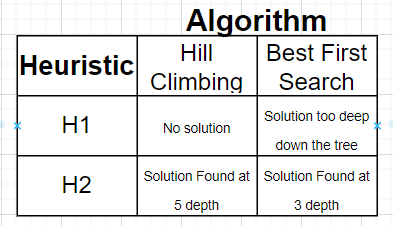

# **Conclusion**

The BlockGame class provides a structured approach to solving the block stacking problem using heuristic search methods. The implementation includes essential search algorithms and heuristic evaluations to guide the search process. While the hill climbing algorithm focuses on local improvements, the best-first search algorithm leverages a priority queue for a broader exploration of the search space. Both algorithms rely on heuristic functions to evaluate and prioritize states, making the class versatile for experimenting with different search strategies and heuristics.






